In [1]:
import glob

# Collating the B5 files

In [58]:
b5_files = glob.glob("data/raw/ADS16_Benchmark_part?/Corpus/Corpus/U*/U*-B5.csv")
b5_files

['data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0001\\U0001-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0002\\U0002-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0003\\U0003-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0004\\U0004-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0005\\U0005-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0006\\U0006-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0007\\U0007-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0008\\U0008-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0009\\U0009-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0010\\U0010-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0011\\U0011-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0012\\U0012-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0013\\U0013-B5.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\

In [2]:
import re

In [17]:
pattern = re.compile("\d+")

In [19]:
b5_files[0]

'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0001\\U0001-B5.csv'

In [24]:
str(b5_files[0])

'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0001\\U0001-B5.csv'

In [3]:
def get_userid(string):
    m = re.findall(r"(U\d+)\\U", string)
    return m[0]

In [53]:
list(map(get_userid, b5_files))

['U0001',
 'U0002',
 'U0003',
 'U0004',
 'U0005',
 'U0006',
 'U0007',
 'U0008',
 'U0009',
 'U0010',
 'U0011',
 'U0012',
 'U0013',
 'U0014',
 'U0015',
 'U0016',
 'U0017',
 'U0018',
 'U0019',
 'U0020',
 'U0021',
 'U0022',
 'U0023',
 'U0024',
 'U0025',
 'U0026',
 'U0027',
 'U0028',
 'U0029',
 'U0030',
 'U0031',
 'U0032',
 'U0033',
 'U0034',
 'U0035',
 'U0036',
 'U0037',
 'U0038',
 'U0039',
 'U0040',
 'U0041',
 'U0042',
 'U0043',
 'U0044',
 'U0045',
 'U0046',
 'U0047',
 'U0048',
 'U0049',
 'U0050',
 'U0051',
 'U0052',
 'U0053',
 'U0054',
 'U0055',
 'U0056',
 'U0057',
 'U0058',
 'U0059',
 'U0060',
 'U0061',
 'U0062',
 'U0063',
 'U0064',
 'U0065',
 'U0066',
 'U0067',
 'U0068',
 'U0069',
 'U0070',
 'U0071',
 'U0072',
 'U0073',
 'U0074',
 'U0075',
 'U0076',
 'U0077',
 'U0078',
 'U0079',
 'U0080',
 'U0081',
 'U0082',
 'U0083',
 'U0084',
 'U0085',
 'U0086',
 'U0087',
 'U0088',
 'U0089',
 'U0090',
 'U0091',
 'U0092',
 'U0093',
 'U0094',
 'U0095',
 'U0096',
 'U0097',
 'U0098',
 'U0099',
 'U0100',


In [34]:
m = re.match(r"(\d+)", r"corp\U0012\a")
print(m)

None


In [10]:
import pandas as pd

In [4]:
def read_file_add_id(filepath):
    user_id = get_userid(filepath)
    df = pd.read_csv(filepath,sep=";")
    df["user_id"] = user_id
    return df

In [60]:
b5_dfs = [read_file_add_id(filepath) for filepath in b5_files]

In [61]:
b5 = pd.concat(b5_dfs)

In [62]:
b5.columns

Index(['Question#', 'Answer', 'user_id'], dtype='object')

In [63]:
b5.columns = ["Question_no", "Answer","user_id"]

In [74]:
b5.columns = sanitize_names(b5.columns)

In [75]:
b5.head(), b5.tail()

(   question_no  answer user_id
 0            1       1   U0001
 1            2       2   U0001
 2            3      -2   U0001
 3            4       0   U0001
 4            5      -1   U0001,
    question_no  answer user_id
 5            6       2   U0120
 6            7       1   U0120
 7            8       1   U0120
 8            9      -1   U0120
 9           10       2   U0120)

In [72]:
import seaborn as sns

In [5]:
import missingno

<AxesSubplot:>

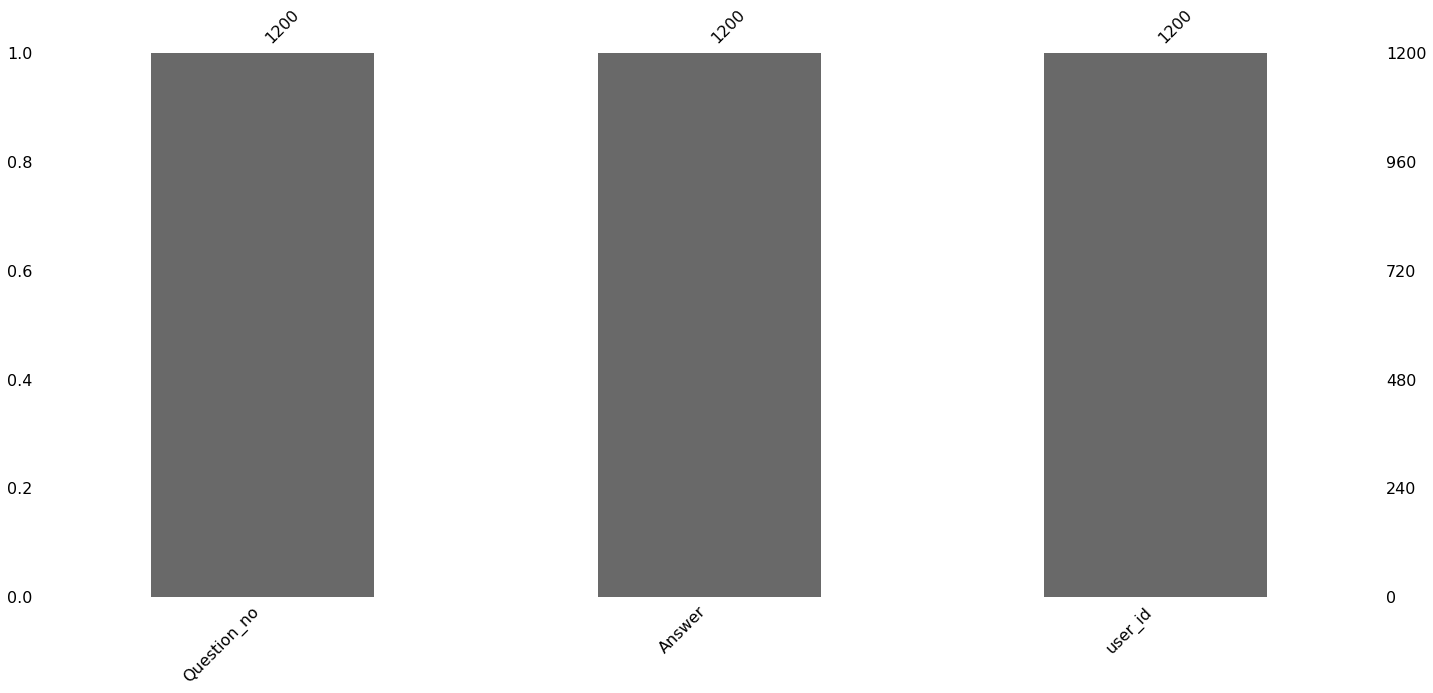

In [79]:
missingno.bar(b5)

In [76]:
b5.to_csv("data/processed/b5.csv", index=False)

# Collate user information

In [65]:
inf_files = glob.glob("data/raw/ADS16_Benchmark_part?/Corpus/Corpus/U*/U*-INF.csv")
inf_files

['data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0001\\U0001-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0002\\U0002-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0003\\U0003-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0004\\U0004-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0005\\U0005-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0006\\U0006-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0007\\U0007-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0008\\U0008-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0009\\U0009-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0010\\U0010-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0011\\U0011-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0012\\U0012-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0013\\U0013-INF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Cor

In [66]:
inf_df = [read_file_add_id(filepath) for filepath in inf_files]

In [67]:
inf_df = pd.concat(inf_df)

In [68]:
inf_df

,Name,Last Name,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Home town,Cap/Zip-Code,Timepass,Countries visited,Fave Sports,user_id
0,Hidden,Hidden,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,Internet,United States of America,I do not like Sports,U0001
0,Hidden,Hidden,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Chicago,60638,Internet,"Poland, Mexico, United States of America",Nothing,U0002
0,Hidden,Hidden,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Greenville,54942,Sports,France,"Team sports (Footbal, Baseball, Rugby, ...)",U0003
0,Hidden,Hidden,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,London,NW1 1EU,Internet,"United States of America, United Kingdom, Ital...","Individual sports‎ (Tennis, Archery, ...)",U0004
0,Hidden,Hidden,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Prague,10000,Sports,"Russia, Slovakia, Slovenia, China, India, Fran...","Individual sports‎ (Tennis, Archery, ...)",U0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Hidden,Hidden,F,28,hidden@yahoo.com,Contract employment,Full Time,2,United States of America,Colorado,80031,Reading,Iraq,I do not like Sports,U0116
0,Hidden,Hidden,F,55,hidden@hotmail.com,Self-employment,Full Time,2,United States of America,Bellflower,90706,Internet,"Mexico, Canada, Bahamas","Olympic sports‎, Equestrian sports‎, Motor spo...",U0117
0,Hidden,Hidden,F,18,hidden@yahoo.com,Student,Full Time,2,United States of America,San Mateo,94401-2727,Reading,"Italy, France, Germany, Switzerland, Austria",I do not like Sports,U0118
0,Hidden,Hidden,F,61,hidden@hush.ai,Temporary,Part Time,1,Canada,Toronto,M5S1R8,Movie,"Germany, France, United Kingdom",Other,U0119


<AxesSubplot:>

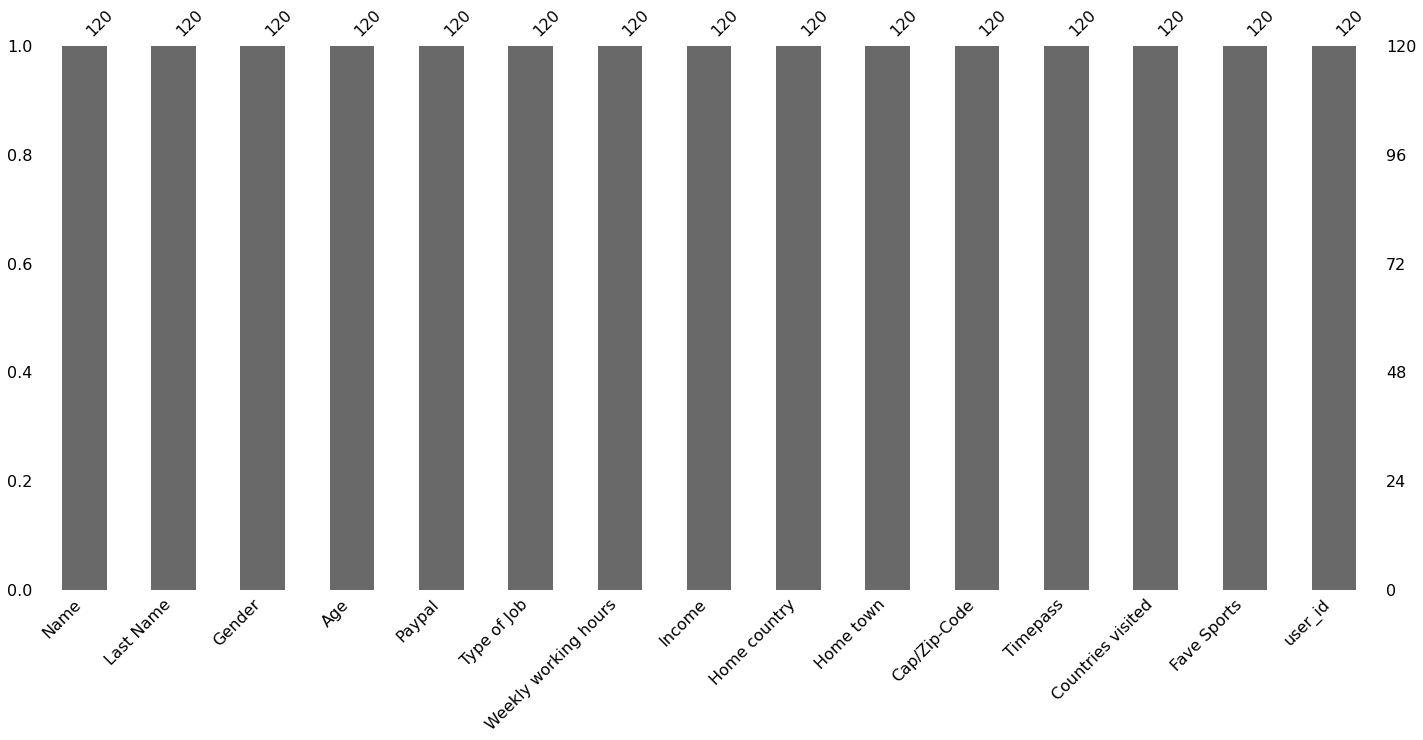

In [78]:
missingno.bar(inf_df.isna())

In [69]:
def sanitize_names(string_list):
    string_list = [strg.strip() for strg in string_list]
    string_list = [re.sub('\s','_', strg) for strg in string_list]
    string_list = [re.sub('[^A-Za-z0-9]','_', strg) for strg in string_list]
    string_list = [col.lower() for col in string_list]
    return string_list

In [70]:
inf_df.columns, sanitize_names(inf_df.columns)

(Index(['Name', 'Last Name', 'Gender', 'Age', 'Paypal', 'Type of Job',
        'Weekly working hours', 'Income', 'Home country', 'Home town',
        'Cap/Zip-Code', 'Timepass', 'Countries visited', 'Fave Sports',
        'user_id'],
       dtype='object'),
 ['name',
  'last_name',
  'gender',
  'age',
  'paypal',
  'type_of_job',
  'weekly_working_hours',
  'income',
  'home_country',
  'home_town',
  'cap_zip_code',
  'timepass',
  'countries_visited',
  'fave_sports',
  'user_id'])

In [71]:
inf_df.columns = sanitize_names(inf_df.columns)

In [103]:
inf_df.to_csv("data/processed/inf.csv",index=False)

# Collate preference information

In [11]:
pref_files = glob.glob("data/raw/ADS16_Benchmark_part?/Corpus/Corpus/U*/U*-PREF.csv")
pref_files

['data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0001\\U0001-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0002\\U0002-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0003\\U0003-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0004\\U0004-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0005\\U0005-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0006\\U0006-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0007\\U0007-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0008\\U0008-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0009\\U0009-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0010\\U0010-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0011\\U0011-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0012\\U0012-PREF.csv',
 'data/raw\\ADS16_Benchmark_part1\\Corpus\\Corpus\\U0013\\U0013-PREF.csv',
 'data/raw\\ADS16_Benchma

In [15]:
def collate(filepaths):
    df_list = [read_file_add_id(filepath) for filepath in filepaths]
    df_list = pd.concat(df_list)
    df_list.columns = sanitize_names(df_list.columns)
    df_list = df_list.reset_index(drop=True)
    return df_list

In [16]:
pref_df = collate(pref_files)

In [17]:
pref_df

,Most_visited_websites,Most_listened_musics,Most_watched_movies,Most_watched_tv_programmes,Most_read_books,user_id
0,"Media (Books, DVD, CD/DVD Music) sites, Grocer...","Classical Music, Easy Listening, Jazz","Action, Thriller, Drama, Comedy, Mystery","Comedy, Drama",Mystery,U0001
1,"Toys &amp; games sites, Console &amp; video ga...","Dance Music, Electronic Music, Indie Pop, Pop ...",Drama,Drama,"Romance, Mystery, Science fiction, Science",U0002
2,"Sports &amp; outdoor sites, Media (Books, DVD,...","Hip Hop - Rap, Dance Music, Electronic Music, ...","Comedy, Documentary","Sport, News",Biographies,U0003
3,"Stationery &amp; office supplies sites, Clothi...","Alternative Music, Pop (Popular music), Rock","Comedy, Action, Drama, Animation, Musical, Fam...","Comedy, Drama","Science fiction, Satire, Trilogies, Series",U0004
4,"Consumer electronics sites, Clothing &amp; sho...","Electronic Music, Asian Pop (J-Pop or K-pop), ...","Sci-Fi, Adventure, Thriller, Action, Crime and...","Learning, Weather","Science fiction, Action and Adventure, Mystery...",U0005
...,...,...,...,...,...,...
115,"Clothing &amp; shoes sites, Baby products site...","Alternative Music, Pop (Popular music)","Drama, Comedy, Family","Drama, Children's","Series, Romance, Fantasy, Trilogies",U0116
116,"Health &amp; Beauty sites, Home stuffs sites, ...","Hip Hop - Rap, R&amp;B - Soul, Pop (Popular mu...","Drama, Comedy, Crime and Gangster","Comedy, Drama, Entertainment (Variety Shows), ...","Drama, Romance, Mystery",U0117
117,"Media (Books, DVD, CD/DVD Music) sites, Health...","Electronic Music, Hip Hop - Rap, Asian Pop (J-...","Action, Thriller, Comedy, Crime and Gangster, ...","Comedy, Drama, Entertainment (Variety Shows)","Drama, Action and Adventure, Romance, Mystery,...",U0118
118,"Clothing &amp; shoes sites, Health &amp; Beaut...","New Age, Jazz","Comedy, Drama, Documentary","Comedy, Drama","Satire, Romance, Biographies",U0119


In [97]:
pref_df["Most_visited_websites"][0]

'Media (Books, DVD, CD/DVD Music) sites, Grocery &amp; beverages sites, Pet supplies sites'

# Splitting each column value into lists of entities

https://stackoverflow.com/questions/49020531/regex-to-match-only-commas-not-in-parentheses-or-square-brackets

In [22]:
re.split("(?!<(?:\(|\[)[^)\]]+),(?![^(\[]+(?:\)|\]))",pref_df["Most_visited_websites"][0])

['Media (Books, DVD, CD/DVD Music) sites',
 ' Grocery &amp; beverages sites',
 ' Pet supplies sites']

In [23]:
def split_categories(string):
    # Pattern to match the commas outside of brackets
    pattern = "(?!<(?:\(|\[)[^)\]]+),(?![^(\[]+(?:\)|\]))"
    result_set = re.split(pattern, string)
    return result_set
    

In [24]:
pref_df["Most_visited_websites"].apply(split_categories) 

0      [Media (Books, DVD, CD/DVD Music) sites,  Groc...
1      [Toys &amp; games sites,  Console &amp; video ...
2      [Sports &amp; outdoor sites,  Media (Books, DV...
3      [Stationery &amp; office supplies sites,  Clot...
4      [Consumer electronics sites,  Clothing &amp; s...
                             ...                        
115    [Clothing &amp; shoes sites,  Baby products si...
116    [Health &amp; Beauty sites,  Home stuffs sites...
117    [Media (Books, DVD, CD/DVD Music) sites,  Heal...
118    [Clothing &amp; shoes sites,  Health &amp; Bea...
119                         [Consumer electronics sites]
Name: Most_visited_websites, Length: 120, dtype: object

In [25]:
pref_df["Most_visited_websites"] = pref_df["Most_visited_websites"].apply(split_categories) 
pref_df["Most_listened_musics"] = pref_df["Most_listened_musics"].apply(split_categories)
pref_df["Most_watched_movies"] = pref_df["Most_watched_movies"].apply(split_categories)
pref_df["Most_watched_tv_programmes"] = pref_df["Most_watched_tv_programmes"].apply(split_categories)
pref_df["Most_read_books"] = pref_df["Most_read_books"].apply(split_categories)


In [26]:
pref_df

,Most_visited_websites,Most_listened_musics,Most_watched_movies,Most_watched_tv_programmes,Most_read_books,user_id
0,"[Media (Books, DVD, CD/DVD Music) sites, Groc...","[Classical Music, Easy Listening, Jazz]","[Action, Thriller, Drama, Comedy, Mystery]","[Comedy, Drama]",[Mystery],U0001
1,"[Toys &amp; games sites, Console &amp; video ...","[Dance Music, Electronic Music, Indie Pop, ...",[Drama],[Drama],"[Romance, Mystery, Science fiction, Science]",U0002
2,"[Sports &amp; outdoor sites, Media (Books, DV...","[Hip Hop - Rap, Dance Music, Electronic Musi...","[Comedy, Documentary]","[Sport, News]",[Biographies],U0003
3,"[Stationery &amp; office supplies sites, Clot...","[Alternative Music, Pop (Popular music), Rock]","[Comedy, Action, Drama, Animation, Musical...","[Comedy, Drama]","[Science fiction, Satire, Trilogies, Series]",U0004
4,"[Consumer electronics sites, Clothing &amp; s...","[Electronic Music, Asian Pop (J-Pop or K-pop)...","[Sci-Fi, Adventure, Thriller, Action, Crim...","[Learning, Weather]","[Science fiction, Action and Adventure, Myst...",U0005
...,...,...,...,...,...,...
115,"[Clothing &amp; shoes sites, Baby products si...","[Alternative Music, Pop (Popular music)]","[Drama, Comedy, Family]","[Drama, Children's]","[Series, Romance, Fantasy, Trilogies]",U0116
116,"[Health &amp; Beauty sites, Home stuffs sites...","[Hip Hop - Rap, R&amp;B - Soul, Pop (Popular...","[Drama, Comedy, Crime and Gangster]","[Comedy, Drama, Entertainment (Variety Shows...","[Drama, Romance, Mystery]",U0117
117,"[Media (Books, DVD, CD/DVD Music) sites, Heal...","[Electronic Music, Hip Hop - Rap, Asian Pop ...","[Action, Thriller, Comedy, Crime and Gangst...","[Comedy, Drama, Entertainment (Variety Shows)]","[Drama, Action and Adventure, Romance, Myst...",U0118
118,"[Clothing &amp; shoes sites, Health &amp; Bea...","[New Age, Jazz]","[Comedy, Drama, Documentary]","[Comedy, Drama]","[Satire, Romance, Biographies]",U0119


In [27]:
newdf = pref_df.copy()

In [28]:
newdf = newdf[["user_id","Most_visited_websites"]]

In [29]:
newdf

,user_id,Most_visited_websites
0,U0001,"[Media (Books, DVD, CD/DVD Music) sites, Groc..."
1,U0002,"[Toys &amp; games sites, Console &amp; video ..."
2,U0003,"[Sports &amp; outdoor sites, Media (Books, DV..."
3,U0004,"[Stationery &amp; office supplies sites, Clot..."
4,U0005,"[Consumer electronics sites, Clothing &amp; s..."
...,...,...
115,U0116,"[Clothing &amp; shoes sites, Baby products si..."
116,U0117,"[Health &amp; Beauty sites, Home stuffs sites..."
117,U0118,"[Media (Books, DVD, CD/DVD Music) sites, Heal..."
118,U0119,"[Clothing &amp; shoes sites, Health &amp; Bea..."


# Flattening the pandas dataframe containing lists and writing individual files

In [38]:
def convert_list_to_df(df, column_name):
    newdf = df.copy()
    newdf = newdf[["user_id",column_name]]
    
    result = []
    for i, row in newdf.iterrows():
        d = pd.DataFrame({"user_id":row[0], column_name: row[1]})
        result.append(d)
    result = pd.concat(result)
    return result.reset_index(drop=True)

In [78]:
pref_websites = convert_list_to_df(pref_df, "Most_visited_websites")
pref_websites.to_csv("data/processed/pref_websites.csv", index= False)
pref_websites

,user_id,Most_visited_websites
0,U0001,"Media (Books, DVD, CD/DVD Music) sites"
1,U0001,Grocery &amp; beverages sites
2,U0001,Pet supplies sites
3,U0002,Toys &amp; games sites
4,U0002,Console &amp; video games sites
...,...,...
353,U0118,Health &amp; Beauty sites
354,U0119,Clothing &amp; shoes sites
355,U0119,Health &amp; Beauty sites
356,U0119,Grocery &amp; beverages sites


In [81]:
pref_music = convert_list_to_df(pref_df, "Most_listened_musics")
pref_music.to_csv("data/processed/pref_music.csv", index = False)
pref_music

,user_id,Most_listened_musics
0,U0001,Classical Music
1,U0001,Easy Listening
2,U0001,Jazz
3,U0002,Dance Music
4,U0002,Electronic Music
...,...,...
343,U0118,Rock
344,U0118,R&amp;B - Soul
345,U0119,New Age
346,U0119,Jazz


In [82]:
pref_movies = convert_list_to_df(pref_df, "Most_watched_movies")
pref_movies.to_csv("data/processed/pref_movies.csv", index = False)
pref_movies

,user_id,Most_watched_movies
0,U0001,Action
1,U0001,Thriller
2,U0001,Drama
3,U0001,Comedy
4,U0001,Mystery
...,...,...
481,U0118,Romance
482,U0119,Comedy
483,U0119,Drama
484,U0119,Documentary


In [45]:
pref_tv = convert_list_to_df(pref_df, "Most_watched_tv_programmes")
pref_tv.to_csv("data/processed/pref_tv.csv")
pref_tv

,user_id,Most_watched_tv_programmes
0,U0001,Comedy
1,U0001,Drama
2,U0002,Drama
3,U0003,Sport
4,U0003,News
...,...,...
320,U0118,Drama
321,U0118,Entertainment (Variety Shows)
322,U0119,Comedy
323,U0119,Drama


In [83]:
pref_books = convert_list_to_df(pref_df, "Most_read_books")
pref_books.to_csv("data/processed/pref_books.csv", index = False)
pref_books

,user_id,Most_read_books
0,U0001,Mystery
1,U0002,Romance
2,U0002,Mystery
3,U0002,Science fiction
4,U0002,Science
...,...,...
417,U0118,Fantasy
418,U0119,Satire
419,U0119,Romance
420,U0119,Biographies


# Convert all column names to lower case

In [94]:
def convert_columns_tolower(filepath):
    df = pd.read_csv(filepath)
    colnames = df.columns
    colnames = [col.lower() for col in colnames]
    df.columns = sanitize_names(colnames)
    df.to_csv(filepath, index=False)
    return colnames

In [ ]:
pref_df.to_csv

In [85]:
glob.glob("data/processed/*.csv")

['data/processed\\b5.csv',
 'data/processed\\inf.csv',
 'data/processed\\negative.csv',
 'data/processed\\positive.csv',
 'data/processed\\pref_books.csv',
 'data/processed\\pref_movies.csv',
 'data/processed\\pref_music.csv',
 'data/processed\\pref_tv.csv',
 'data/processed\\pref_websites.csv',
 'data/processed\\rating.csv']

In [86]:
convert_columns_tolower('data/processed\\inf.csv')

['name',
 'last_name',
 'gender',
 'age',
 'paypal',
 'type_of_job',
 'weekly_working_hours',
 'income',
 'home_country',
 'home_town',
 'cap_zip_code',
 'timepass',
 'countries_visited',
 'fave_sports',
 'user_id']

In [87]:
for path in glob.glob("data/processed/*.csv"):
    convert_columns_tolower(path)

In [95]:
convert_columns_tolower('data/processed\\rating.csv')

['question no.', 'user_id', 'category', 'value']

In [96]:
r = pd.read_csv('data/processed\\rating.csv')

In [97]:
r.head()

,question_no_,user_id,category,value
0,0,U0001,Automotive,1
1,1,U0001,Automotive,1
2,2,U0001,Automotive,1
3,3,U0001,Automotive,1
4,4,U0001,Automotive,1


In [102]:
inf_df = inf_df[["user_id", 'name', 'last_name', 'gender', 'age', 'paypal', 'type_of_job',
       'weekly_working_hours', 'income', 'home_country', 'home_town',
       'cap_zip_code', 'timepass', 'countries_visited', 'fave_sports']]

In [100]:
inf_df.columns

Index(['name', 'last_name', 'gender', 'age', 'paypal', 'type_of_job',
       'weekly_working_hours', 'income', 'home_country', 'home_town',
       'cap_zip_code', 'timepass', 'countries_visited', 'fave_sports',
       'user_id'],
      dtype='object')

In [104]:
inf_df.head()

,user_id,name,last_name,gender,age,paypal,type_of_job,weekly_working_hours,income,home_country,home_town,cap_zip_code,timepass,countries_visited,fave_sports
0,U0001,Hidden,Hidden,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,Internet,United States of America,I do not like Sports
0,U0002,Hidden,Hidden,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Chicago,60638,Internet,"Poland, Mexico, United States of America",Nothing
0,U0003,Hidden,Hidden,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Greenville,54942,Sports,France,"Team sports (Footbal, Baseball, Rugby, ...)"
0,U0004,Hidden,Hidden,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,London,NW1 1EU,Internet,"United States of America, United Kingdom, Ital...","Individual sports‎ (Tennis, Archery, ...)"
0,U0005,Hidden,Hidden,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Prague,10000,Sports,"Russia, Slovakia, Slovenia, China, India, Fran...","Individual sports‎ (Tennis, Archery, ...)"


In [105]:
rating_df = pd.read_csv('data/processed\\rating.csv')

In [110]:
rating_df.head()

,user_id,category,question_no_,value
0,U0001,Automotive,0,1
1,U0001,Automotive,1,1
2,U0001,Automotive,2,1
3,U0001,Automotive,3,1
4,U0001,Automotive,4,1


In [109]:
rating_df = rating_df[["user_id","category","question_no_","value"]]

In [111]:
rating_df.to_csv('data/processed\\rating.csv', index=False)

<AxesSubplot:>

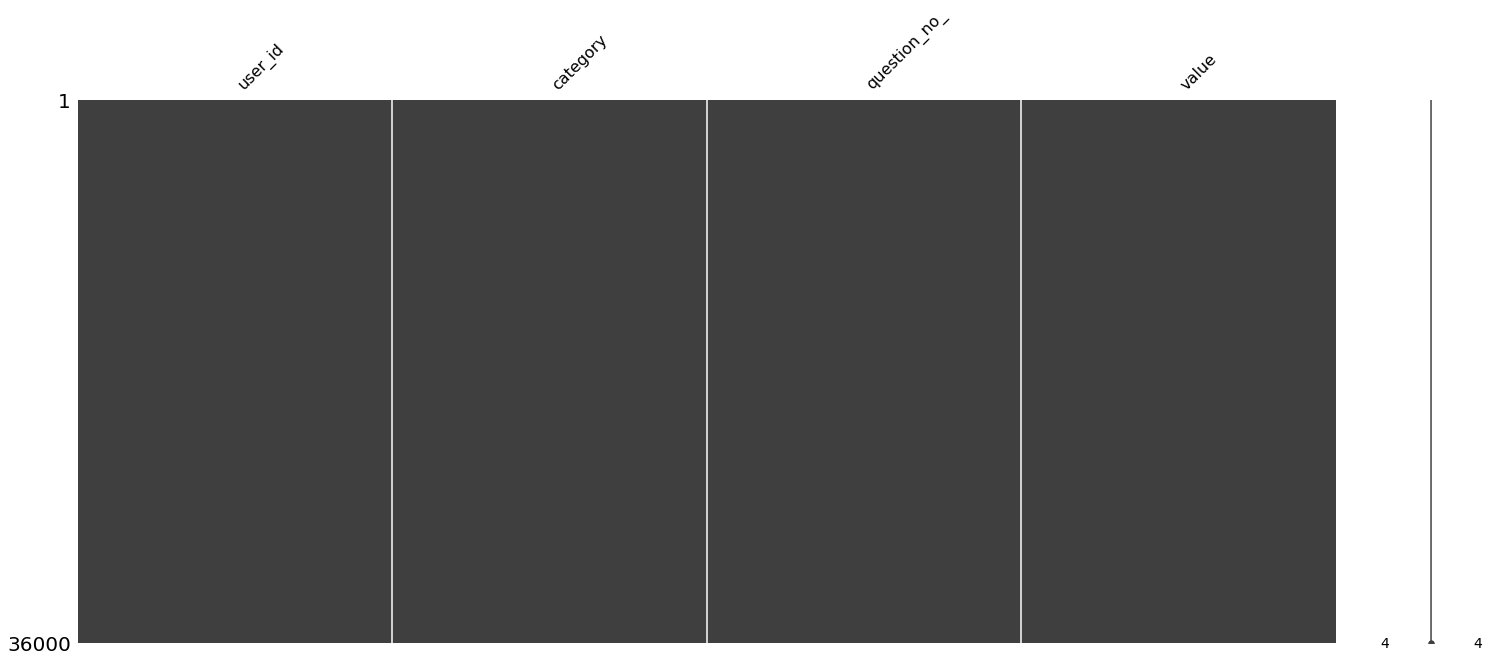

In [112]:
missingno.matrix(rating_df)